# ※ naver Open Api를 활용하여 네이버 지식인 '전주 여행'과 '경주 여행'을 검색 -> 명사만 추출(re) -> 빈도분석(DataFrame), 시각화(워드클라우드)

# 1. 네이버 api를 활용하여 두 검색어 추출

In [21]:
import os
import sys
import urllib.request
client_id = "lCl5wdVFNY5CDZLC_OFT"
client_secret = "QCFpUZzi6G"
encText = urllib.parse.quote("전주여행")
url = f'https://openapi.naver.com/v1/search/kin.json?query={encText}&display=100'
# url = "https://openapi.naver.com/v1/search/kin.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    print(response_body.decode('utf-8'))
else:
    print("Error Code:" + rescode)

{
	"lastBuildDate":"Mon, 30 Dec 2024 17:11:25 +0900",
	"total":47106,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"<b>전주여행<\/b> 대중교통이랑 렌트카중 어떤게 좋을까요?",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=477694429&qb=7KCE7KO87Jes7ZaJ&enc=utf8&section=kin.qna&rank=1&search_sort=0&spq=0",
			"description":"... <b>전주여행<\/b>때 움직이기 차가 편할지 대중교통이 편할지 알려주세요. 교통 상황이 어떤지 궁금합니다. <b>전주여행<\/b> 전주맛집 국내여행 전주달봉이 달봉티비 <b>전주여행<\/b>코스 전주가볼만한곳 여수여행 여수가볼만한곳 제주도여행... "
		},
		{
			"title":"<b>전주여행<\/b>갈려고하는데요!",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=472294467&qb=7KCE7KO87Jes7ZaJ&enc=utf8&section=kin.qna&rank=2&search_sort=0&spq=0",
			"description":"<b>전주여행<\/b>을 갈려고하는데요!아는사람과 갈려고하는데 호텔은 좋은가격에 정했고~ 음..2박3일여행인데 얼마정도갖고가면좋을까요?그리고 맛집같은거 카페같은거 추천해주세요! <b>전주여행<\/b>을 갈려고하는데요!아는사람과 갈려고하는데... "
		},
		{
			"title":"<b>전주 여행<\/b>",
			"link":"https:\/\/kin.naver.com\/qna\/detail.naver?d1id=9&dirId=90110&docId=472340028&qb=7KCE7KO87Jes7ZaJ&e

In [1]:
from requests import get
import time
import os
import json # response 텍스트를 json 딕셔너리로
from html import unescape # &lt; => &gt; ->
import pandas as pd

In [2]:
# 네이버 API 계정 정보
client_id = "lCl5wdVFNY5CDZLC_OFT"
client_secret = "QCFpUZzi6G"
queries = ['전주 여행', '경주 여행']
max_start = 5 # 5page 갖고오기

In [3]:
query = '전주 여행'
start = 0
headers = {"X-Naver-Client-Id":client_id, 
           "X-Naver-Client-Secret":client_secret}
url = f'https://openapi.naver.com/v1/search/blog.json?query={query}&display=100&start={start+1}'
response = get(url, headers=headers)
print(response.text[:500])

{
	"lastBuildDate":"Mon, 30 Dec 2024 17:36:50 +0900",
	"total":1130091,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"<b>전주<\/b> 1박2일 <b>여행<\/b> 호텔 추천 <b>전주<\/b> 신라스테이 조식 위치 맛집",
			"link":"https:\/\/blog.naver.com\/jangrose5932\/223701851243",
			"description":"전주가 처음인 엄마를 위해 맛집부터 호텔까지 꼼꼼하게 준비했는데요, 저희의 1박2일 여행이 여러분의 <b>전주 여행<\/b> 계획에도 도움이 되길 바랍니다 :) 1. 전주 호텔 위치 여행의 즐거움을 두 배로 만드는건 바로... ",
			"bloggername":"여행 인플루언서 서아름아❣️",
			"bloggerlink":"blog.naver.com\/jangrose5932",
			"postdate"


In [4]:
# 데이터를 저장할 파일 생성 (파일명:naver_kin.txt)하고 title 저장
file_name = 'data/naver_kin.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('query', 'no', 'title', 'link', 'description', 'total_text'))

In [7]:
elements = json.loads(response.text)['items']
elements[0]

{'title': '<b>전주</b> 1박2일 <b>여행</b> 호텔 추천 <b>전주</b> 신라스테이 조식 위치 맛집',
 'link': 'https://blog.naver.com/jangrose5932/223701851243',
 'description': '전주가 처음인 엄마를 위해 맛집부터 호텔까지 꼼꼼하게 준비했는데요, 저희의 1박2일 여행이 여러분의 <b>전주 여행</b> 계획에도 도움이 되길 바랍니다 :) 1. 전주 호텔 위치 여행의 즐거움을 두 배로 만드는건 바로... ',
 'bloggername': '여행 인플루언서 서아름아❣️',
 'bloggerlink': 'blog.naver.com/jangrose5932',
 'postdate': '20241222'}

In [15]:
for i, element in enumerate(elements):
    title = element['title'].replace('<b>', ' ').replace('</b>', ' ')
    link = element['link']
    description = element['description'].replace('<b>', ' ').replace('</b>', ' ')
    description = unescape(description)  # html 특수문자 처리(&lt;를 <로 대체)
    # print(query, (start*100 + i + 1), title, link, description, title + ' ' + description)
    with open(file_name, 'a', encoding='utf-8') as file:
        file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(query,
                                                     start*100 + i + 1,
                                                     title,
                                                     link,
                                                     description,
                                                     title + ' ' + description))

In [16]:
df = pd.read_csv('data/naver_kin.txt', sep='\t')
df.head(2)

,query,no,title,link,description,total_text
0,전주 여행,1,전주 1박2일 여행 호텔 추천 전주 신라스테이 조식 위치 맛집,https://blog.naver.com/jangrose5932/223701851243,"전주가 처음인 엄마를 위해 맛집부터 호텔까지 꼼꼼하게 준비했는데요, 저희의 1박2일...",전주 1박2일 여행 호텔 추천 전주 신라스테이 조식 위치 맛집 전주가 처...
1,전주 여행,2,"전주 가성비호텔, 아기랑 전주여행 숙소, 글로스터호텔",https://blog.naver.com/jinha1210/223702923938,이번 결혼기념일에 밥만먹고 지나간게 아쉬워 급 전주여행 을 떠났다. 당일이라기엔 ...,"전주 가성비호텔, 아기랑 전주여행 숙소, 글로스터호텔 이번 결혼기념일에 밥만먹고 ..."


In [31]:
from requests import get
import time
import os
import json # response 텍스트를 json 딕셔너리로
from html import unescape # &lt; => <, &gt; -> > 
import pandas as pd

In [32]:
# 네이버 API 계정 정보
client_id = "lCl5wdVFNY5CDZLC_OFT"
client_secret = "QCFpUZzi6G"
queries = ['전주 여행', '경주 여행']
max_start = 5 # 5page 갖고오기

In [33]:
def get_search_element_save(query, start):
    headers = {"X-Naver-Client-Id":client_id, 
               "X-Naver-Client-Secret":client_secret}
    url = f'https://openapi.naver.com/v1/search/blog.json?query={query}&display=100&start={start+1}'
    response = get(url, headers=headers)
    elements = json.loads(response.text)['items']
    for i, element in enumerate(elements):
        title = element['title'].replace('<b>', ' ').replace('</b>', ' ')
        link = element['link']
        description = element['description'].replace('<b>', ' ').replace('</b>', ' ')
        description = unescape(description)  # html 특수문자 처리(&lt;를 <로 대체)
        # print(query, (start*100 + i + 1), title, link, description, title + ' ' + description)
        with open(file_name, 'a', encoding='utf-8') as file:
            file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format(query,
                                                     start*100 + i + 1,
                                                     title,
                                                     link,
                                                     description,
                                                     title + ' ' + description))

In [34]:
# 데이터를 저장할 파일 생성 (파일명:naver_kin.txt)하고 title 저장
file_name = 'data/naver_kin.txt'
with open(file_name, 'w', encoding='utf-8') as file:
    file.write('{}\t{}\t{}\t{}\t{}\t{}\n'.format('query', 'no', 'title', 'link', 'description', 'total_text'))

In [35]:
for query in queries:
    for start in range(max_start):
        print(start, query, '읽고 파일 쓰기 중')
        get_search_element_save(query, start)
        time.sleep(0.3)

0 전주 여행 읽고 파일 쓰기 중
1 전주 여행 읽고 파일 쓰기 중
2 전주 여행 읽고 파일 쓰기 중
3 전주 여행 읽고 파일 쓰기 중
4 전주 여행 읽고 파일 쓰기 중
0 경주 여행 읽고 파일 쓰기 중
1 경주 여행 읽고 파일 쓰기 중
2 경주 여행 읽고 파일 쓰기 중
3 경주 여행 읽고 파일 쓰기 중
4 경주 여행 읽고 파일 쓰기 중


# 2. 품사 태깅 저장

In [36]:
df = pd.read_csv('data/naver_kin.txt', sep='\t')
df.sample()

,query,no,title,link,description,total_text
918,경주 여행,419,경주카페 이스트1779 경주여행 코스 소금모나카 추천,https://blog.naver.com/breadssalong_/223683914156,마지막 날 방문하게 된 경주 이스트1779 오랜만에 힐링타임을 가진 너무 멋진 곳이...,경주카페 이스트1779 경주여행 코스 소금모나카 추천 마지막 날 방문하게 된 경...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   query        1000 non-null   object
 1   no           1000 non-null   int64 
 2   title        1000 non-null   object
 3   link         1000 non-null   object
 4   description  1000 non-null   object
 5   total_text   995 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [38]:
# 데이터 프레임은 for문을 돌릴 경우 컬럼명만 적용
for row in df:
    print(row)

query
no
title
link
description
total_text


In [39]:
# 데이터 프레임을 for문 적용을 위해 list 형변환
df_list = df[['query', 'no', 'total_text']].values.tolist()
print(type(df_list))
print(df_list[::250])

<class 'list'>
[['전주 여행', 1, ' 전주  1박2일  여행  호텔 추천  전주  신라스테이 조식 위치 맛집 전주가 처음인 엄마를 위해 맛집부터 호텔까지 꼼꼼하게 준비했는데요, 저희의 1박2일 여행이 여러분의  전주 여행  계획에도 도움이 되길 바랍니다 :) 1. 전주 호텔 위치 여행의 즐거움을 두 배로 만드는건 바로... '], ['전주 여행', 251, '전주 1박2일여행코스 추천해드리고  전주 여행  맛집 후기...  전주 한옥마을, 경기전, 그리고 야시장까지, 처음 전주를 방문하는 분들이라면 꼭 가보아야 할  전주 여행  코스입니다. ▶▶ 전주 1박2일여행코스 연관 내용 자세하게 알아봅시다! ◀◀ 전주 한옥마을... '], ['경주 여행', 1, ' 경주여행  대릉원 드론촬영하기! (경주시청허가必) 사진 ⓒ쿠우욱 안녕하세요 여행블로거 쿠우욱입니다 지난  경주여행 을 떠나기전 경주 유적지들의 드론촬영을 해보고 싶어서 미리 경주시 문화유산과에 촬영 허가를 받고 방문하였습니다 :D 경주대릉원  위치... '], ['경주 여행', 251, '함께한 가을 단풍여행 1박2일  경주여행 코스 경주가볼만한곳 경주렌트카 카모아와 함께한 가을 단풍여행 1박2일  경주여행 코스 경주가볼만한곳 글 / 사진 - 사진작가 김대형 안녕하세요 DHK.Photogallery 김대형입니다. 본 포스팅은 카모아 홍보를 목적으로 여행 기간 동안... ']]


In [172]:
file_name = 'data/naver_kin_pos.csv'
with open(file_name, 'w') as file : 
    file.write('{},{},{},{}\n'.format('query', 'no', 'token', 'pos'))

In [173]:
from konlpy.tag import Hannanum, Kkma, Komoran, Okt
from mecab import MeCab
stopwords = ['여행', '전주', '경주']
# 원하는 품사 : 일반명사, 고유명사
select_pos = ['N'] # Hannanum(ntags=9)
# select_pos = ['NC', 'NQ'] # Hannanum(ntags=22)
# select_pos = ['NNG', 'NNP'] # Kkma, komoran, MeCab
# select_pos = ['Noun'] # Okt

In [174]:
# n, 음, ㅋㅋ , ㅎㅎ 제거
import re
text = '음. 경주 좋아요 ㅎㅎ 진짜 일까? ㅠㅠ'
re.sub('[^가-힣\s]',' ', text) #\s 스페이스 ^ 반대를 의미

'음  경주 좋아요    진짜 일까    '

In [175]:
# pos_tagger = Hannanum() # 띄어쓰기 단위로 형태소 분석
# pos_tagger = Komoran() # 띄어쓰기를 안해도 최선을 다해 형태소 분석
# pos_tagger = Kkma() # 속도 성능 죄저
pos_tagger = MeCab()
for i, row in enumerate(df_list):
    query = row[0]
    no    = row[1]
    text  = row[2]
    print('수정 전 : ', text)
    text = re.sub('[^가-힣\s]', ' ', text)
    text = re.sub('\s+', ' ', text)
#     print('수정 후 : ', text, end='\n\n')
    text_pos = pos_tagger.pos(text) # Hannanum(ntags=22)
    if i%250 ==0:
        print(query, no, len(text), end='\n\n')
    for token, pos in text_pos :
#         if token not in stopwords and pos in select_pos and len(token) >1 : # 명사만 저장
        if token not in stopwords and len(token) >1 : # 모든 품사를 우선 다 저장
            with open(file_name, 'a', encoding='cp949') as file:
                file.write('{},{},{},{}\n'.format(query, no, token, pos))

수정 전 :   전주  1박2일  여행  호텔 추천  전주  신라스테이 조식 위치 맛집 전주가 처음인 엄마를 위해 맛집부터 호텔까지 꼼꼼하게 준비했는데요, 저희의 1박2일 여행이 여러분의  전주 여행  계획에도 도움이 되길 바랍니다 :) 1. 전주 호텔 위치 여행의 즐거움을 두 배로 만드는건 바로... 
전주 여행 1 143

수정 전 :  전주 가성비호텔, 아기랑  전주여행 숙소, 글로스터호텔 이번 결혼기념일에 밥만먹고 지나간게 아쉬워 급  전주여행 을 떠났다. 당일이라기엔 애매하지만 늦게 도착해 거의 당일같은 여행이랄까? 그래서 잠만 자기 좋은 호텔 찾음. #전주호텔 #글로스터호텔전주 새벽에... 
수정 전 :   전주여행  : 전주향교, 한옥마을, 카페 차경, 수목원 전북  전주여행  2024.11.16 전주는 이번이 두번째 작년 3월에 갔을 땐 일 끝나고 잠깐 들른거라... 나는 후각이 예민하고 여행하면서는 특히 향을 중시하는 편이어서인지 더 그랬는지도 반영이 예술 ~ 오 여기가... 
수정 전 :   전주  가족 여행  숙소, 한옥마을 둘러보기 지금 어딜 가야 해서 숙소와 진안 여행은 다음 편에서 계속할게요. # 전주여행  #전주가족여행 #전주남부시장 #전주남부시장야시장 #전주한옥마을 #전주경기전 #전주풍남문 #전동성당 #전주가볼만한곳
수정 전 :   전주여행  가볼만한곳 덕진공원 단풍 연화정 도서관 전주 덕진공원  전주여행 은 많이 왔었는데 전주 덕진공원은 처음이라니! 알고보니 전주단풍명소로 꽤... (깨끗한 화장실도 있음) 곳곳이 포토존이라서 예쁜옷 입고 가서 사진 남기기에도 좋은곳 여행에서 사진은... 
수정 전 :  [ 전주여행 ] 수제각 (feat. 외국인들을 위한 한옥마을체험 수제...  한옥마을 체험을 위해서 신청했던 수제 도장 만들기 수제각  전주여행 에서 뭘 하면 좋을까 고민하다가... 광주에서 전주로 고고고 광주에서 전주는 고속버스를 타고 갔다 KTX는 대전에 갔다 다시 내려가야 하기... 
수정 전 :  전주 호텔 신라스테이  전주

수정 전 :   전주 호텔 신라스테이  전주  숙박 후기  전주 미식 여행   전주여행  신라스테이 전주 눈 내리던 날 다녀온  전주여행  :) 전주는 미식 여행하기 좋은 여행지인데요. 걸어서 한옥마을도 객리단길도 즐길 수 있는 딱 좋은 위치에 신규 오픈한 신라스테이 전주 숙박 후기... 
수정 전 :  전주 효자동 맛집과  전주 여행  선물, 현지인 추천 리스트 있어, 어떤 메뉴를 선택해도 후회하지 않을 것 같아요. 전주 효자동을 방문하신다면, 이 맛집에서 한식을 즐겨보시는 것을 추천드려요. ▶▶ 연관 내용 한 번에 알아보기! ◀◀ 클릭 #전주효자동맛집 # 전주여행 선물
수정 전 :  가을  여행  필수 코스  전주  덕진공원에서 힐링하세요 가득한 이곳에서 자연과 전통의 아름다움을 만끽하며 특별한 추억을 만들어보세요. 덕진공원은 여러분의  전주여행 을 더욱 특별하게 만들어 줄 것입니다. 지금까지 가을 여행 필수 코스! 전주 덕진공원이었습니다.
수정 전 :   전주 여행 코스와  전주여행 후기, 현지인 추천 루트로 즐기기 ▶▶ 관련 내용 꼼꼼히 체크해보기 ◀◀ 클릭  전주 여행 코스를 따라 여행하며 전주 가볼만한곳을 탐방하는 것은 전주의 매력을 깊이 체험할 수 있는 방법입니다. 다음 여행에서는 전주수목원이나 전주... 
수정 전 :   전주 여행  2박3일(24년 11월 15일~17일) 그런면에서 전주는 KTX로 여행하기 딱 좋은 여행지다. 용산역에서 전주로 KTX로 출발했다. 머리털 나고... 이번  전주 여행  하면서 한옥과 단풍, 특히 은행나무를 원 없이 보고 왔다. 공원 내 분위기 한적 하고... 
수정 전 :  이색적인 [ 7080 ] 추억 여행   전주 난장 체험 전시장 feat....  색다른  전주 여행 을 원한다면 7080 추억여행 전주난장은 꼭 가보세요~!! #전주가볼만한곳 # 전주여행  #전주한옥마을 # 전주여행  #전주내돈내산 #전주체험전시 #전주전시장 #전주체험관 #전주추억여행... 
수정 전 :   전주여행 후기 및  전주 여행  선물

수정 전 :   전주 여행  가볼만한곳 호텔 신라스테이전주 맛집 삼백집 미식여행하기 좋은 전주에서 행복한 시간 보내세요! #신라스테이전주 #전주신라스테이 # 전주여행  #전주가볼만한곳 #전주호텔 #전주호텔추천 #전주가성비호텔 #전주맛집 #전주맛집여행 #전주1박2일
수정 전 :  전주 1박2일여행코스와  전주 여행  맛집, 짧은 시간 알차게...  가을의 노란 단풍이 장관을 이루는 전주는 다시 찾고 싶은 곳입니다. 이번 여행을 통해 전주의 아름다움을 만끽할 수 있었습니다. #전주1박2일여행코스, # 전주여행 맛집, #전북투어패스
수정 전 :  2024년도 불주먹들과  전주  1박 2일  여행  기록 -2 다시 돌아온  전주 여행  2탄 시작함미다- 전주를 그리다 게하에 짐 맡겨놓고 풍년제과 가는 길에 만난... 집에 갔다 끝- 재미있었던 전주 1박2일 불주먹캠프 종료- 담엔 세뭉이도 같이 여행갔으면 좋겠다~~ 진짜 끝
수정 전 :   전주  1박2일  여행  코스 한옥마을 객리단길 고기 맛집 중앙동...  한번 들러보시길~ 한옥마을에서의 여유로운 시간과 함께 맛있는 고기를 즐기며 1박 2일 여행 코스를 완성해 보면 좋겠죠? 전주의 아름다움과 맛을 모두 느낄 수 있는 이 코스로  전주 여행 을 즐겨보시길 바랍니다!
수정 전 :   전주 여행  신라스테이 전주 뚜벅이 맛집 후기 * 신라스테이로부터 원고료와 숙박권을 제공받아 작성한 솔직한 후기입니다  전주 여행  신라스테이... 다음에 방문하면 꼬옥 운동복 챙겨서 여기서 운동까지 해줘야겠어요 이번 전주 뚜벅이 여행은 동선을 잘... 
수정 전 :  전주한옥마을여행선물 및  전주 여행 코스 정해볼까요 즐거운 여행을 마치고 집으로 돌아가는 길에 혹 빠진 것 없는지 전주한옥마을여행선물을 챙겨보세요. 전주에서의 시간이 오래도록 마음에 남을 것입니다. #전주한옥마을여행선물 # 전주여행 코스
수정 전 :  국내패키지여행  전주여행 해 1박2일 일정 총정리 국내패키지여행 1박2일  전주여행 해 고즈넉한 늦가을의 정취를 느끼고 싶

수정 전 :   전주 여행  추억맛집 필수코스 진미집 변화가 덜해서 반가웠던 돼지불고기 추억 맛집 진미집이었어요. :D #전주맛집 # 전주여행 맛집 #전주먹거리 #전주돼지불고기 #전주현지인맛집 #전주실내마차원조 #전주연탄구이 #전주진미집 #전주노포 #진미집본점
수정 전 :  [전주/남노송동]  전주여행  꼭 가볼 만한 곳! 전주한옥마을 옛날에 가서 초코파이 샀었는데 이번에는 패스했네요.  전주 여행 에 빠질 수 없는 곳 전주 한옥마을! 곳곳에 숨어있는 볼거리 놓치지 말고 즐거운 여행 되세요:) 끝.
수정 전 :   전주 여행  맛집과 전주한옥마을여행선물, 맛과 멋을 즐기다  전주 여행  맛집을 탐방하며 전주의 매력을 마음껏 느껴보세요. # 전주여행 맛집 #전주한옥마을여행선물 본 포스팅은 업체로부터 소정의 원고료를 지급받아 작성되었습니다.
수정 전 :  12월 국내  여행  숙소 예약 야놀자특가 라한호텔  전주  호텔 할인팁 야놀자특가 숙페셜데이로 가성비 있게 즐겨보자구요! #야놀자 #숙페셜데이 #야놀자특가 #야놀자숙페셜데이 #라한호텔전주 #국내숙소 #야놀자국내숙소 #크리스마스여행 # 전주여행 
수정 전 :  [일상] 11월 일기 (+결혼 1주년 기념  전주여행 ) 11월의 크리스마스 느낌있다  전주여행  정말 좋아 #다가여행자도서관 #전주가볼만한곳 새로운 것을 좋아하는 나  전주여행  와서 느낀 점이 국내여행 좋은 곳은 무궁무진하다는 것 담엔 부여쪽 백제문화권 여행도... 
수정 전 :  전주 서학동 예술마을 골목 산책,  전주 여행 의 새로운 매력 서학동 예술마을에서 골목길을 산책하며 여유를 느껴 보셔도 좋을 것 같아요. 예술마을 도서관 #전주서학동예술마을 #전주골목산책 #전주골목여행 #전주한옥마을근처가볼만한곳 #전주가볼만한곳 # 전주여행 
수정 전 :   전주 여행  가볼만한곳 호텔 신라스테이전주 맛집 삼백집 미식여행하기 좋은 전주에서 행복한 시간 보내세요! #신라스테이전주 #전주신라스테이 # 전주여행  #전주가볼만한곳 #전주호텔 #전주호텔추천 #전주가성비

수정 전 :   전주 한옥마을 오래만에 떠난 먹방 여행  먹방여행을 계획을 잡다, 호야맘이 좋아하는 #전주한옥마을로 결정하고, 방문 하였습니다!! 이번 여행도... 1박2일  전주 여행 기간 중 2일차 새벽에 눈이 약간 오면서 약간 다른 느낌의 사진들을 담을수 있었는데요.... 
수정 전 :   전주  1박2일 여행 코스 및  전주 뚜벅이 여행 코스 자세히 알아보자 여행의 첫 번째 날, 전주한옥마을을 둘러보는 것으로 시작해 볼까요. 전주한옥마을은 오래된 전통 한옥과 다양한 문화유산이 공존하는 곳입니다. 경기전, 풍남문, 향교 등 볼거리가 많아  전주 여행  필수 코스로... 
수정 전 :  ESTJ 철수투어 뚜벅뚜벅  전주 여행  1박2일 고고링 즐거운 ESTJ 철수투어 : 전북  전주 여행  여행일자 : 2024년 11월 12일-13일 (월-화) 이동수단 : 기차(서대전역-전주역), 전주시내버스 1일차 서대전역 → 전주역 → 호성동고깃집 → 전주동물원 → 코지풋샵... 
수정 전 :   전주 여행  한옥마을 놀거리 한복대여 체험 이색 데이트 스냅...  핑플피  전주 여행 하면 가장 먼저 떠오르는 것은 무엇인가요? 바로 전주 한옥마을이 아닐까 싶어요. 고즈넉한 한옥과 골목길이 어우러진 이곳은 마치 시간 여행을 떠난 듯한 느낌을 주죠. 특히 한옥마을에서의... 
수정 전 :   전주  호텔 아이랑 가족 여행   전주 시그니처 레지던스호텔  전주 여행  코스로 한옥마을에서 호텔까지 15분 거리라 가깝기도 하고 동선이 편해서 이동하기 편했어요. 고급 호텔은 아니지만 자는데 불편함 없었고 아이랑 전주 가족 여행 숙소로 만족스러워요.... 
수정 전 :  전주 1박2일여행코스 추천 및  전주여행 후기 주변 명소 추가 탐방 이 코스를 통해 전주의 전통과 현대적인 감각이 어우러진 매력을 충분히 느낄 수 있을 것입니다. ▶▶ 관련 내용 꼼꼼히 체크해보기 ◀◀ 클릭 #전주1박2일여행코스 # 전주여행 후기
수정 전 :  전주 1박2일여행코스와  전주 여행 지, 알찬 여행을 위

수정 전 :   전주  뚜벅이 혼자  여행 코스 책방 겸 북카페 서점카프카 '나'라는 정원을 가꾸어가는 이야기, 여행블로거 하은정원입니다. 1박 2일로 무척 짧게  전주 여행  찍먹하고 왔어요! 4번째 전주인데, 꽤 오래간만이라 기대했는데요. 짧은 시간 동안 전주의 매력을 찐하게... 
수정 전 :  전주비빔밥 맛집 알아보고  전주 여행 코스 체크해봐요 하니, 전주 한옥마을을 방문하실 때 참고하시면 알뜰한 여행이 될 거예요. 풍남정은 전주 한옥마을에서... ▶▶ 전주비빔밥 맛집 관련정보 자세히 확인하기 ◀◀ 클릭 #전주비빔밥맛집 # 전주여행 코스 이 글은... 
수정 전 :   전주  한옥마을 먹거리  여행 코스 신라스테이  전주  루프탑 라운지...  아니라 전주 먹거리들이 많아서 여행 내내 즐거웠었죠 이번  전주 여행 은 먹거리 여행이라고 해도 될 정도예요 이번에 전주 실내 데이트 코스 찾다가 알게 된 신라스테이 전주 루프탑 라운지 후기까지 함께... 
수정 전 :  [ 전주 여행 ] 전주 애견동반 여행. 가을 끝자락 그래도 나름 일찍 출발했다 생각했는데 서울에서 전주까지 4시간이나 걸렸다... 주말여행은 정말... 오랜만에 온 전주성당. 아침에 그 많은 차들이 어디갔나했더니 우리와 같은  전주 여행  온 사람들인 듯 하다.... 
수정 전 :   전주 한옥마을  여행  길거리음식 먹거리 총집합 여행경비에 먹거리, 길거리음식 비용이 제일 많은 부분을 차지하지만 그래도 너무 행복하고 즐거웠던 전주 한옥마을 여행이었어요..^^  전주여행  가시면 한옥마을 꼭 들러보시고 먹거리도 다양하게 즐겨보세요~!!
수정 전 :   전주 한옥마을 오래만에 떠난 먹방 여행  먹방여행을 계획을 잡다, 호야맘이 좋아하는 #전주한옥마을로 결정하고, 방문 하였습니다!! 이번 여행도... 1박2일  전주 여행 기간 중 2일차 새벽에 눈이 약간 오면서 약간 다른 느낌의 사진들을 담을수 있었는데요.... 
수정 전 :   전주  1박2일 여행 코스 및  전주 뚜벅이 여행 코스 자세히 알아

수정 전 :   경주여행 코스 루지월드에서 이색적인 경험 후기 가족이  경주여행 코스를 정해 여행을 다녀왔거든요. 유구한 역사와 자연이 공존하는 색다른 문화를... 저희가 찾아간  경주여행 코스는 경주 루지월드인데요. 새파란 하늘과 푸른 숲이 우거진 아름다운 경치가... 
수정 전 :  [육아일기] 아기랑  경주여행  소품샵 황리단길 촬영 겸 여행 겸 다녀온 경주 연말엔 요런 겨울 분위기 가득 풍기는 그런 옷을 입히고싶음... 놀이터나 키즈카페 가는줄 알고 신났다가 뭐 특별한게 없으니 빨리 다른데 가자곸ㅋㅋ  경주 여행 이라고 하기엔... 
수정 전 :   경주여행  황리단길맛집 외할머니집같은 황남두꺼비 한국올때마다 기회가 되면 꼭 방문하는 도시가 경주에요.  경주여행 에서 황리단길이 빠질수 없죠? 저에게 경주 황리단길은 교토의 기온스트릿이에요.ㅎㅎㅎ 3살 여자아이 사진 한장 찍기 힘드네요.ㅎㅎㅎ... 
수정 전 :  무더운 여름에도  경주여행  괜찮아(석굴암 불국사) 움 울산 어디로 가지 고민하다가 울산보단 경주! 어때해서 가게 되었다. 먼 거리 오시니깐 경주쯤에... 먼거리 오셔서 고단하고 힘드실법 한데  경주 여행 도 불평없이, 즐겁게 만끽하고 가시고! 편히 주무시고... 
수정 전 :   경주여행  추천카페 SOL 한옥 툇마루와 정원 핫플 분위기 경주 황리단길에 한옥카페 SOL 검색해서 다녀온 건 아니고, 황리단길 구경하고 대릉원 산책 가는 길에 예뻐서 들어간 카페였다. 들어가서 이름을 보니 "카페솔"이었다. 내돈내산  경주여행  한옥카페 SOL 후기... 
수정 전 :  대충 찍은 사진으로 기록하는 1박2일  경주여행  제로스페이스 경주, 디스모먼트, 배리삼릉공원은 그곳만의 특별한 소품이 있다. 사진은 지난  경주여행 에 구입한 배리삼릉공원, 디스모먼트 기념품! 조카들한테 다보탑이랑 첨성대 알려주고싶어서 산건데 그... 
수정 전 :   경주여행  01. 라한호텔 연말을 맞이하여  경주여행 을 떠났습니다 언제? 2022년에 ㅋㅋㅋㅋㅋ 경주 라한호텔 룸

TypeError: expected string or bytes-like object

# 3. 명사만 추출하여 빈도분석

In [ ]:
df = pd.read_csv('data/naver_kin_pos.csv', encoding='cp949')
df.tail(2)

In [ ]:
# 명사
# Hannanum(ntags=22) ['NC', 'NQ'] 
# Kkma, komoran, MeCab ['NNG', 'NNP'] 
# Okt ['Noun'] 
df_flt = df.loc[(df['pos']=='NNG') | (df['pos']=='NNP'), ['query', 'token', 'pos']]
df_flt = df.loc[df['pos'].isin(['NNG','NNP']), ['query', 'token', 'pos']]
df_flt.iloc[::1000]

In [ ]:
# query별 token별 count수(빈도수)
# df_flt.groupby(['query', 'token']).count()  # sort 작업 필요
df_grp = df_flt.groupby('query')['token'].value_counts()  # sort 되어 출력됨(시리즈)
df_grp

In [ ]:
# df_grp의 index를 컬럼으로 편입
df_idx = df_grp.reset_index(name='count')
df_idx.iloc[::240]

In [176]:
# 전주 여행, 경주 여행 빈도 추출 -> 병합
a = pd.DataFrame([['단어1',52],
                 ['단어2', 12]], columns=['단어','count'])
b = pd.DataFrame([['단어1',90],
                 ['단어3', 52]], columns=['단어','count'])
# display(a)
# display(b)
ab = pd.merge(a, b,
             how='outer', # inner (공통), left (a기준), right (b기준),
             on='단어') # 두 프레임을 어떤 열 기준으로 병합할지 열이름
ab.fillna(0, inplace=True)
ab.columns=['단어', '경주빈도', '전주빈도']
ab['경주빈도'] = ab['경주빈도'].astype('int')
import numpy as np
ab['전주빈도'] = ab['전주빈도'].astype(np.int16) # int16
ab

,단어,경주빈도,전주빈도
0,단어1,52,90
1,단어2,12,0
2,단어3,0,52


In [177]:
df_gj = df_idx.loc[df_idx['query']=='경주 여행',['token', 'count']]
df_jj = df_idx.loc[df_idx['query']=='전주 여행',['token', 'count']]
df_gj.shape, df_jj.shape

((303, 2), (522, 2))

In [178]:
df_gj.head(10)

,token,count
0,코스,42
1,리단,38
2,추천,28
3,루지,22
4,사진,18
5,월드,18
6,맛집,16
7,카페,16
8,호텔,16
9,이번,14


In [179]:
df_gj.sort_values(by='count', ascending=False).index

Int64Index([  0,   1,   2,   3,   4,   5,   7,   8,   6,   9,
            ...
            177, 178, 179, 180, 181, 182, 183, 184, 185, 302],
           dtype='int64', length=303)

In [180]:
df_mrg = pd.merge(df_gj, df_jj,
                 how='outer',
                 on='token')
df_mrg.columns=['token', '경주빈도', '전주빈도']
df_mrg.fillna(0, inplace=True) # 결측치 0으로 
df_mrg['경주빈도'] = df_mrg['경주빈도'].astype('int16')
df_mrg['전주빈도'] = df_mrg['전주빈도'].astype(np.int16)
df_mrg.head(10)

,token,경주빈도,전주빈도
0,코스,42,774
1,리단,38,50
2,추천,28,294
3,루지,22,0
4,사진,18,130
5,월드,18,0
6,맛집,16,684
7,카페,16,46
8,호텔,16,308
9,이번,14,210


In [181]:
df_mrg['빈도합'] = df_mrg['경주빈도'] + df_mrg['전주빈도']
df_mrg.sort_values(by='빈도합', ascending=False, inplace=True)

In [182]:
df_mrg['경주비율'] = df_mrg['경주빈도']/df_mrg['빈도합']
df_mrg['전주비율'] = df_mrg['전주빈도']/df_mrg['빈도합']
df_mrg = df_mrg.reset_index(drop=True)
df_mrg

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율
0,코스,42,774,816,0.051471,0.948529
1,맛집,16,684,700,0.022857,0.977143
2,한옥마을,0,388,388,0.000000,1.000000
3,후기,10,364,374,0.026738,0.973262
4,숙소,6,352,358,0.016760,0.983240
...,...,...,...,...,...,...
699,리조트,2,0,2,1.000000,0.000000
700,리가,2,0,2,1.000000,0.000000
701,레이저,2,0,2,1.000000,0.000000
702,대한민국,2,0,2,1.000000,0.000000


In [183]:
# 비율은 컬럼은 %
def method(x):
    return "{:.2%}".format(x)
method(0.0068)

'0.68%'

In [184]:
df_mrg['경주비율'] = df_mrg['경주비율'].apply(lambda x : "{:.2%}".format(x))
df_mrg['전주비율'] = df_mrg['전주비율'].apply(lambda x : "{:.2%}".format(x))
df_mrg.head()

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율
0,코스,42,774,816,5.15%,94.85%
1,맛집,16,684,700,2.29%,97.71%
2,한옥마을,0,388,388,0.00%,100.00%
3,후기,10,364,374,2.67%,97.33%
4,숙소,6,352,358,1.68%,98.32%


In [185]:
df_mrg[df_mrg['token'].isin(['경주여행', '전주여행'])]

,token,경주빈도,전주빈도,빈도합,경주비율,전주비율


In [ ]:
df_mrg.to_csv('data/naver_kin_count.csv', encoding='cp949', index=False)

# 4. 워드 클라우드
- 전주여행 명사만, 경주여행 명사만

In [187]:
df_flt['pos'].unique()

array(['NNP', 'NNG'], dtype=object)

In [190]:
df_flt.iloc[::3000]

,query,token,pos
0,전주 여행,호텔,NNP
4519,전주 여행,선택,NNG
9009,전주 여행,도시,NNG
13516,전주 여행,스테이,NNP
18013,전주 여행,베이커리,NNP
22531,전주 여행,발길,NNG


In [193]:
# 전주 여행 token들, 경주여행 token들
jj_noun_list = df_flt.loc[df_flt['query']=='전주 여행', 'token'].tolist()
gj_noun_list = df_flt.loc[df_flt['query']=='경주 여행', 'token'].tolist()
print(jj_noun_list)
print(gj_noun_list)

['호텔', '추천', '신라', '스테이', '조식', '위치', '맛집', '처음', '엄마', '맛집', '호텔', '준비', '계획', '도움', '호텔', '위치', '즐거움', '배로', '성비', '호텔', '아기', '숙소', '글로스터', '호텔', '이번', '결혼기념일', '당일', '도착', '당일', '호텔', '호텔', '글로스터', '호텔', '새벽', '전주향교', '한옥마을', '카페', '수목원', '전북', '이번', '작년', '후각', '중시', '반영', '예술', '가족', '숙소', '한옥마을', '가야', '숙소', '진안', '다음', '계속', '가족', '남부', '시장', '남부', '시장', '야시장', '전주한옥마을', '경기전', '풍남문', '전동성당', '주가', '한곳', '한곳', '덕진', '공원', '단풍', '연화', '도서관', '덕진', '공원', '덕진', '공원', '처음', '단풍', '명소', '화장실', '곳곳', '포토', '사진', '사진', '수제', '외국인', '한옥마을', '체험', '한옥마을', '체험', '신청', '도장', '수제', '고민', '광주', '고고', '광주', '고속버스', '대전', '호텔', '신라', '스테이', '코스', '추천', '먹거리', '미식', '한옥마을', '풍경', '코스', '맛집', '탐방', '중점', '유명', '맛집', '칼국수', '아기', '리뷰', '커피', '오랜만', '무지개', '케이크', '아이들', '시몬', '주스', '가격', '기억', '시작', '숙소', '정보', '주먹', '기록', '사진', '난리', '표정', '시간', '도착', '택시', '정류장', '사람', '처음', '코스', '순례', '가맥집', '신라', '스테이', '참고', '신라', '스테이', '코스', '가맥집', '순례', '루프', '코스', '추천', '명소', '경기전', '코스', '추천', '명소', '경

In [200]:
df_grp = df_flt.groupby('query')['token'].apply(list)
df_grp

query
경주 여행    [대릉, 촬영, 시청, 허가, 사진, 쿠우, 안녕하세요, 블로거, 쿠우, 유적지, ...
전주 여행    [호텔, 추천, 신라, 스테이, 조식, 위치, 맛집, 처음, 엄마, 맛집, 호텔, ...
Name: token, dtype: object

In [202]:
jj_noun_list = df_grp['전주 여행']
gj_noun_list = df_grp['경주 여행']
print(jj_noun_list[:10])
print(gj_noun_list[:10])

['호텔', '추천', '신라', '스테이', '조식', '위치', '맛집', '처음', '엄마', '맛집']
['대릉', '촬영', '시청', '허가', '사진', '쿠우', '안녕하세요', '블로거', '쿠우', '유적지']


In [204]:
gyeongju = ' '.join(gj_noun_list)
jeonju = ' '.join(jj_noun_list)
print(jeonju[:50])

호텔 추천 신라 스테이 조식 위치 맛집 처음 엄마 맛집 호텔 준비 계획 도움 호텔 위치 즐


In [205]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

- 컬러맵
- https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [207]:
font_path = 'data/NanumPenScript-Regular.ttf'
color_map = 'viridis'

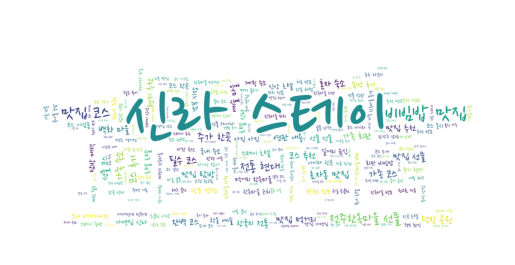

In [219]:
from PIL import Image
mask = np.array(Image.open('data/korea-house-black-fill.png'))
불용어 = set(['경주여행', '전주여행']) # 불용어 처리
wordcloud = WordCloud(
    font_path = font_path,
    background_color= 'white',
    colormap = color_map,
    max_words = 300, # 300개 단어
    max_font_size = 200, # 제일 큰 단어의 글씨 사이즈
    scale = 2, # 스케일값에 따라 이미지 크기의 비율 (값이 클수록 이미지 저장시 선명도가 높아짐)
    stopwords=불용어,
    mask=mask,
    random_state=4 # 랜덤 시드값을 맞추면 같은 모양의 워드 클라우드 생성
).generate(jeonju)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [220]:
# 생성된 wordcloud 이미지 저장 
wordcloud.to_file('data/jeonju_could.jpg')

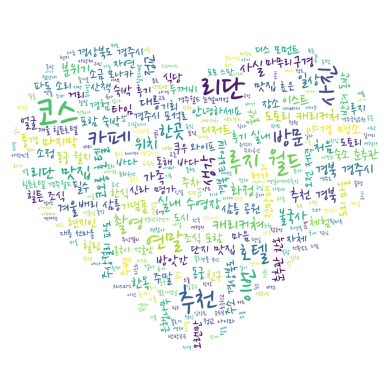

In [223]:
from PIL import Image
mask = np.array(Image.open('data/heart.jpg'))
불용어 = set(['경주여행', '전주여행']) # 불용어 처리
wordcloud = WordCloud(
    font_path = font_path,
    background_color= 'white',
    colormap = color_map,
    max_words = 300, # 300개 단어
    max_font_size = 200, # 제일 큰 단어의 글씨 사이즈
    scale = 2, # 스케일값에 따라 이미지 크기의 비율 (값이 클수록 이미지 저장시 선명도가 높아짐)
    stopwords=불용어,
    mask=mask,
    random_state=4 # 랜덤 시드값을 맞추면 같은 모양의 워드 클라우드 생성
).generate(gyeongju)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [224]:
# 생성된 wordcloud 이미지 저장
wordcloud.to_file('data/gyeongju_could.png')임